In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\PRISHA\OneDrive\Desktop\SML datasets and files\BMI.csv")
df.head()

,Gender,Height,Weight,Final_Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


Based on this build a  model , categorical variable : Gender(fixed value)
Independent values all 3 Gender Height Weight 

In [4]:
df.shape

(500, 4)

In [5]:
df['Gender'].value_counts()

Gender
Female    255
Male      245
Name: count, dtype: int64

In [6]:
df.isnull().sum()

Gender         0
Height         0
Weight         0
Final_Index    0
dtype: int64

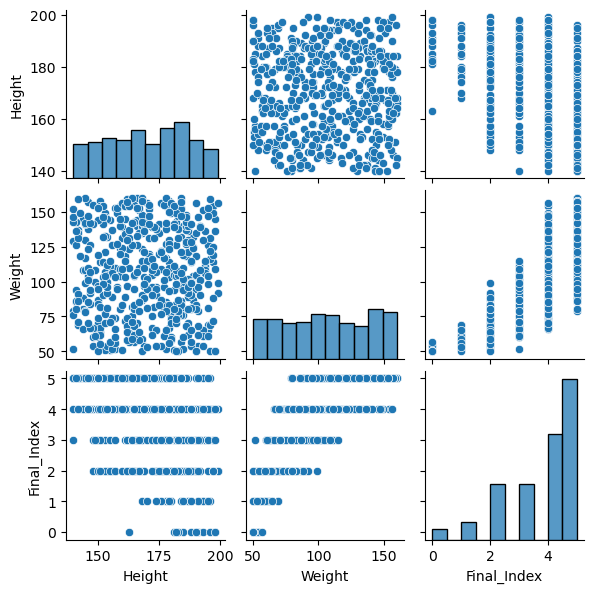

In [7]:

# Assuming 'dataset' is your DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a pair plot with a specified height
sns.pairplot(data = df, height=2)
plt.show()


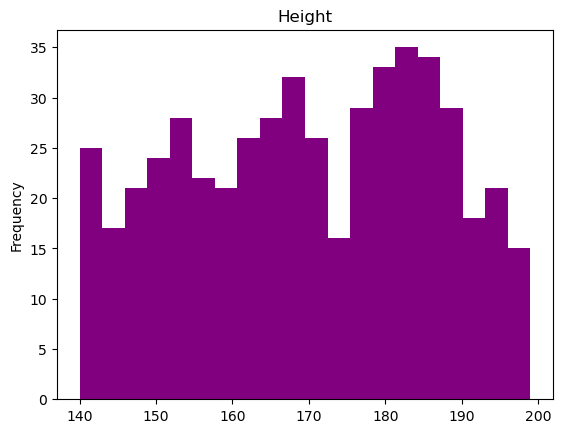

In [8]:
from matplotlib import pyplot as plt 
df['Height'].plot(kind='hist',bins=20,title='Height',color='purple') #grouping 20 sampls to make 1 group (bin)
plt.show()

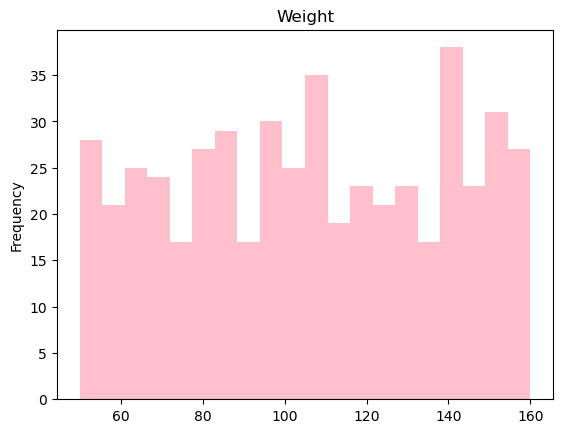

In [9]:
from matplotlib import pyplot as plt 
df['Weight'].plot(kind='hist',bins=20,title='Weight',color ='pink') #grouping 20 sampls to make 1 group (bin)
plt.show()

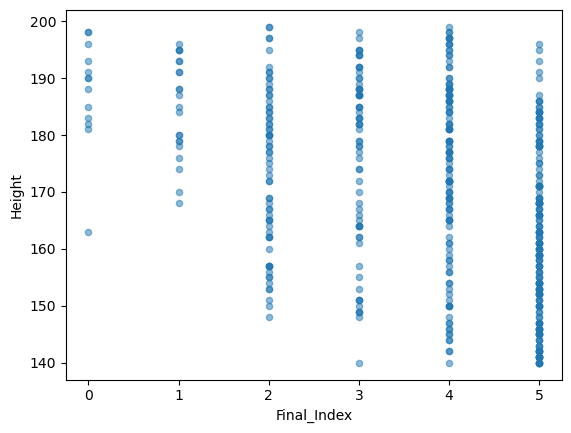

In [10]:
from matplotlib import pyplot as plt
df.plot(kind='scatter',x='Final_Index',y='Height',alpha=0.5)#alpha is for the transperency for thhe dots the lower the more transperent default value is 1 
plt.show()

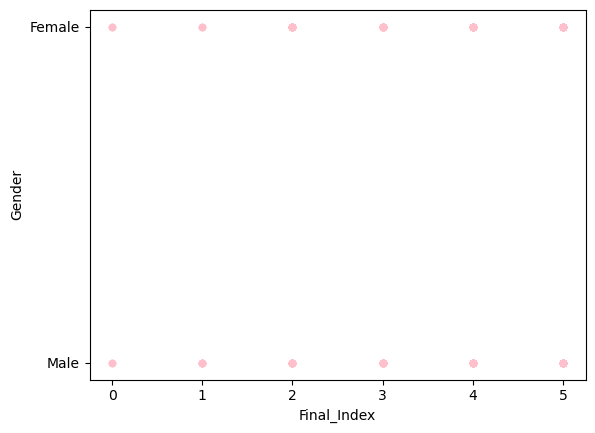

In [11]:
from matplotlib import pyplot as plt
df.plot(kind='scatter',x='Final_Index',y='Gender',alpha=0.5,color='pink')#alpha is for the transperency for thhe dots the lower the more transperent default value is 1 
plt.show()

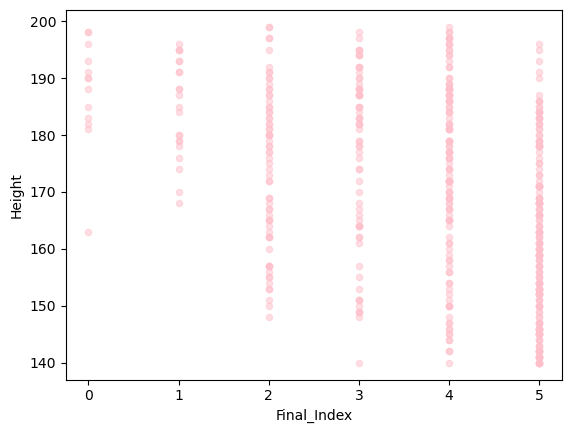

In [12]:
from matplotlib import pyplot as plt
df.plot(kind='scatter',x='Final_Index',y='Height',alpha=0.5,color='pink')#alpha is for the transperency for thhe dots the lower the more transperent default value is 1 
plt.show()

ML works better with int not strings thus we encode gender where male as 0 and female as 1,corelation between independent variables which is on X 

In [14]:
pip install statsmodels

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Assuming 'Gender' column needs mapping
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})  # Use `:` instead of `=` in the dictionary

# Select features
X = df[['Gender', 'Height', 'Weight']]

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Print VIF data
print(vif_data)



  feature        VIF
0  Gender   2.028864
1  Height  11.623103
2  Weight  10.688377


VIF = 1: This indicates no multicollinearity. The predictor is not correlated with other predictors, so it doesn’t inflate the standard error or affect the model’s stability.

VIF between 1 and 5: This suggests moderate multicollinearity. There’s some correlation with other predictors, but it’s usually not severe. However, it’s worth keeping an eye on these predictors to see if multicollinearity becomes a problem, especially if other VIF values are high.

VIF > 5: High multicollinearity is present. The predictor’s standard error may be noticeably inflated, which can make its coefficient less reliable. Consider taking steps to reduce multicollinearity, like removing or combining correlated predictors.

VIF > 10: This signals serious multicollinearity. The predictor’s standard error is highly inflated, and its coefficient estimate is likely unstable. Corrective actions, such as removing the predictor or using regularization techniques, are usually needed.

In [17]:
df['Height_m']=df['Height']/100 #cm to m
df['BMI'] = df['Weight'] / (df['Height_m'] ** 2)

In [18]:
df

,Gender,Height,Weight,Final_Index,Height_m,BMI
0,0,174,96,4,1.74,31.708284
1,0,189,87,2,1.89,24.355421
2,1,185,110,4,1.85,32.140248
3,1,195,104,3,1.95,27.350427
4,0,149,61,3,1.49,27.476240
...,...,...,...,...,...,...
495,1,150,153,5,1.50,68.000000
496,1,184,121,4,1.84,35.739603
497,1,141,136,5,1.41,68.407022
498,0,150,95,5,1.50,42.222222


In [19]:
df.drop(columns=['Height','Weight','Height_m'],inplace=True)

In [20]:
df

,Gender,Final_Index,BMI
0,0,4,31.708284
1,0,2,24.355421
2,1,4,32.140248
3,1,3,27.350427
4,0,3,27.476240
...,...,...,...
495,1,5,68.000000
496,1,4,35.739603
497,1,5,68.407022
498,0,5,42.222222


In [21]:

# Select features
X = df[['Gender', 'BMI']]
y = df['Final_Index']
# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Print VIF data
print(vif_data)

  feature      VIF
0  Gender  1.78564
1     BMI  1.78564


In [22]:
from sklearn.model_selection import train_test_split

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train.shape

(400, 2)

In [24]:
from sklearn.linear_model import LinearRegression

# Initialize the model
mlr = LinearRegression()

# Train the model
mlr.fit(X_train, y_train)

LinearRegression()

In [25]:
print(X_test.shape)

(100, 2)


In [26]:
y_test.shape

(100,)

In [27]:
y_test.head()

361    4
73     2
374    4
155    4
104    4
Name: Final_Index, dtype: int64

In [28]:
#Prediction Test 
y_pred_mlr=mlr.predict(X_test)
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [3.95639371 2.52757798 3.23646063 3.24333707 3.74560417 6.21577577
 4.39408786 5.61548125 3.10048045 5.68660694 3.58071751 4.60630458
 2.22673231 4.28748281 4.64658897 2.78075607 6.33161748 4.98600748
 2.9463922  5.44469029 2.36389516 6.41450424 2.03677578 3.46446116
 3.82409473 5.45488193 6.36667656 6.62894234 4.34725887 2.43130724
 3.90309304 5.19982435 3.8518054  3.41165148 3.24281473 2.27956206
 4.63176077 2.3509873  3.10911258 2.51410134 4.34898947 2.21082533
 3.72827665 3.06477226 4.88211612 3.22106606 3.26491077 3.20009744
 3.42992509 3.39976661 3.99974606 3.71734213 2.19863382 2.03914226
 6.32669642 2.66664183 2.75362977 6.55687839 7.08860952 3.86687454
 4.18730409 5.38272064 3.98217744 3.96845512 1.87459593 2.5129583
 3.09479935 3.44761368 2.32365286 2.33534902 2.19037729 3.95033709
 2.44252047 3.15287782 6.30056492 4.93407942 5.05044733 3.58695819
 2.67485325 4.91569809 4.45402181 2.97972411 2.51034806 5.1973576
 3.39282006 4.66101446 2.90315371 4.073

In [29]:
y_pred_mlr.shape

(100,)

In [30]:
# Create a DataFrame to compare actual and predicted values
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})

# Display the first few rows of the DataFrame
print(mlr_diff.head())


     Actual value  Predicted value
361             4         3.956394
73              2         2.527578
374             4         3.236461
155             4         3.243337
104             4         3.745604


In [31]:
from sklearn.metrics import mean_squared_error 
mse = mean_squared_error(y_test,y_pred_mlr)
rmse = np.sqrt(mse)
print("RMSE value:{: .4f}".format(rmse))

RMSE value: 0.7256


In [32]:
from sklearn.metrics import r2_score

y_pred = mlr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 0.5265655952746275
R-squared Score: 0.6839152438473932


Whenever doing categorical do value counts first dont assume

# Product Performace assign 3

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\PRISHA\Downloads\Practice dataset 1 Product performance.csv")
df.head()

,Ambience,Customer_service,Offers,Product_range,Performance
0,0.50,1.40,-0.68,0.48,2
1,-0.14,0.92,-0.14,0.11,7
2,0.65,0.06,-0.79,0.51,5
3,1.52,-0.65,-0.31,1.12,9
4,-0.23,0.70,-1.89,1.10,8


In [36]:
df.shape

(1000, 5)

In [37]:
df.isnull().sum()

Ambience            0
Customer_service    0
Offers              0
Product_range       0
Performance         0
dtype: int64

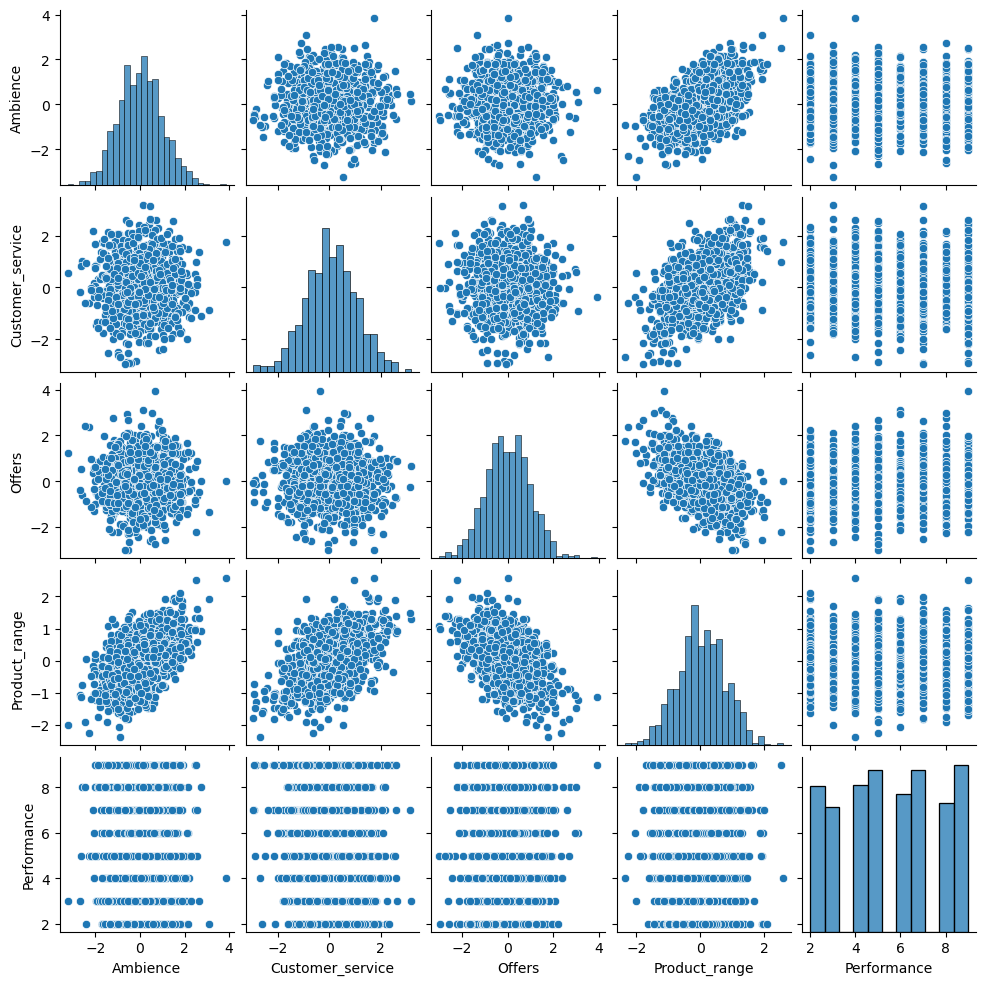

In [38]:

# Assuming 'dataset' is your DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a pair plot with a specified height
sns.pairplot(data = df, height=2)
plt.show()


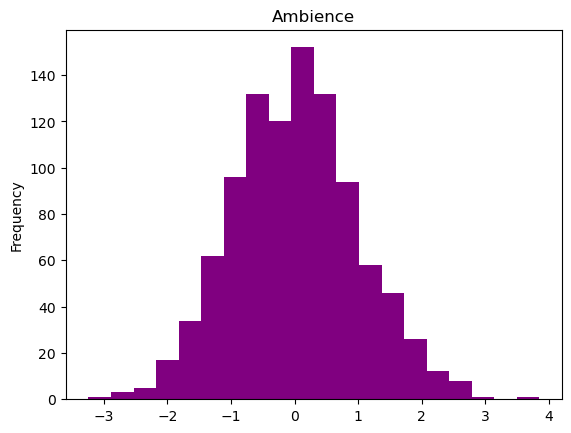

In [39]:
from matplotlib import pyplot as plt 
df['Ambience'].plot(kind='hist',bins=20,title='Ambience',color='purple') #grouping 20 sampls to make 1 group (bin)
plt.show()

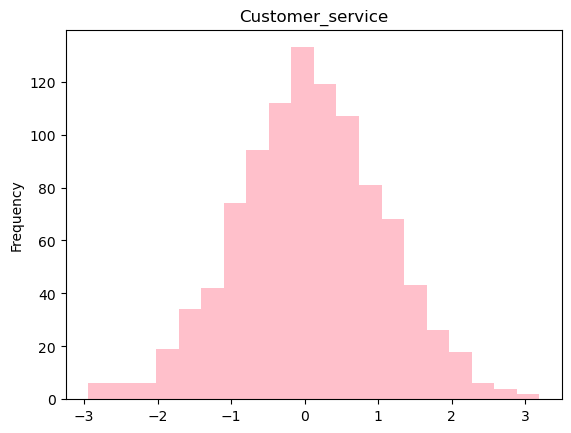

In [40]:
from matplotlib import pyplot as plt 
df['Customer_service'].plot(kind='hist',bins=20,title='Customer_service',color='pink') #grouping 20 sampls to make 1 group (bin)
plt.show()

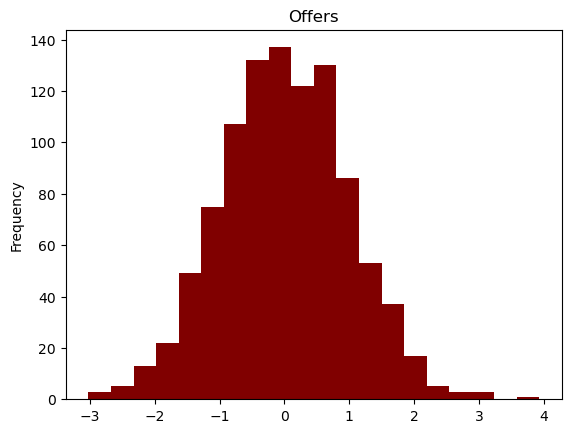

In [41]:
from matplotlib import pyplot as plt 
df['Offers'].plot(kind='hist',bins=20,title='Offers',color='maroon') #grouping 20 sampls to make 1 group (bin)
plt.show()

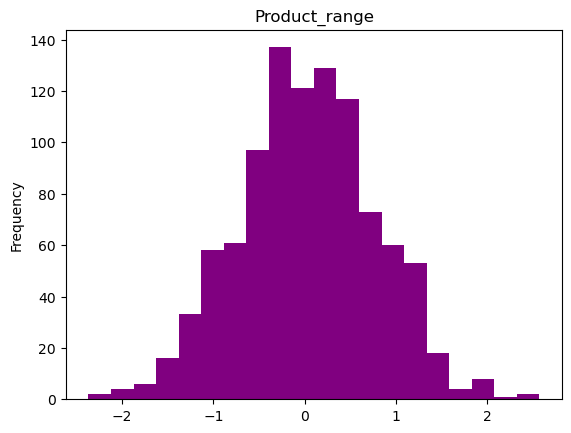

In [42]:
from matplotlib import pyplot as plt 
df['Product_range'].plot(kind='hist',bins=20,title='Product_range',color='purple') #grouping 20 sampls to make 1 group (bin)
plt.show()

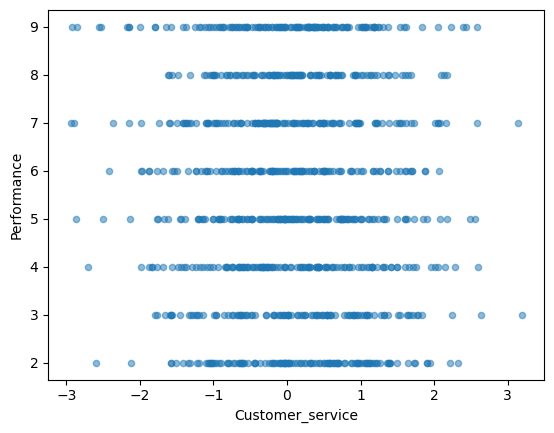

In [43]:
from matplotlib import pyplot as plt
df.plot(kind='scatter',x='Customer_service',y='Performance',alpha=0.5)#alpha is for the transperency for thhe dots the lower the more transperent default value is 1 
plt.show()

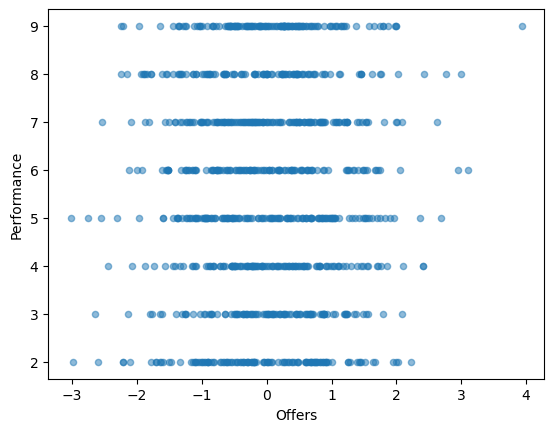

In [44]:
from matplotlib import pyplot as plt
df.plot(kind='scatter',x='Offers',y='Performance',alpha=0.5)#alpha is for the transperency for thhe dots the lower the more transperent default value is 1 
plt.show()

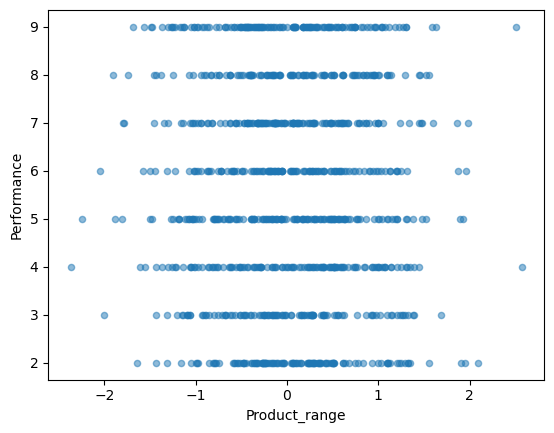

In [45]:
from matplotlib import pyplot as plt
df.plot(kind='scatter',x='Product_range',y='Performance',alpha=0.5)#alpha is for the transperency for thhe dots the lower the more transperent default value is 1 
plt.show()

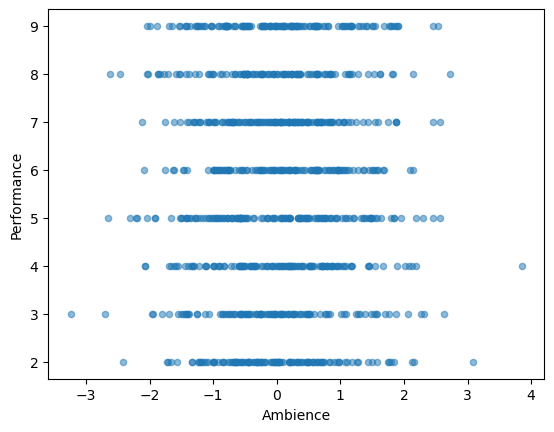

In [46]:
from matplotlib import pyplot as plt
df.plot(kind='scatter',x='Ambience',y='Performance',alpha=0.5)#alpha is for the transperency for thhe dots the lower the more transperent default value is 1 
plt.show()

In [47]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["VIF"] = [variance_inflation_factor(X.values, i)
                  for i in range(X.shape[1])]
    vif.index = X.columns
    return vif

In [49]:
X= df
calc_vif(X)

,VIF
Ambience,3.010502
Customer_service,2.554722
Offers,2.582429
Product_range,5.953562
Performance,1.003680


In [50]:
df = df.drop(columns=['Product_range'])

In [51]:
df.head()

,Ambience,Customer_service,Offers,Performance
0,0.50,1.40,-0.68,2
1,-0.14,0.92,-0.14,7
2,0.65,0.06,-0.79,5
3,1.52,-0.65,-0.31,9
4,-0.23,0.70,-1.89,8


In [52]:
X = df.drop(columns=['Performance'])
y = df['Performance']

In [53]:
calc_vif(X)

,VIF
Ambience,1.001998
Customer_service,1.001611
Offers,1.000601


In [54]:
X.head()

,Ambience,Customer_service,Offers
0,0.50,1.40,-0.68
1,-0.14,0.92,-0.14
2,0.65,0.06,-0.79
3,1.52,-0.65,-0.31
4,-0.23,0.70,-1.89


In [55]:
y.head()

0    2
1    7
2    5
3    9
4    8
Name: Performance, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)

In [57]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 3)
(800,)
(200, 3)
(200,)


In [58]:
from sklearn.linear_model import LinearRegression
mlm = LinearRegression()

mlm.fit(X_train,y_train)

y_pred = mlm.predict(X_test)

In [59]:
print("Prediction for the test set: {}".format(y_pred))

Prediction for the test set: [5.50956276 5.73337006 5.53796105 5.52259076 5.48347244 5.57425434
 5.57292173 5.73541374 5.61762298 5.48813751 5.60555958 5.72759022
 5.7222639  5.51955141 5.5872658  5.59934239 5.66059928 5.69438195
 5.58639154 5.65831    5.43628455 5.71234272 5.51807893 5.48027009
 5.77475797 5.49290864 5.85570016 5.62500946 5.54207302 5.67577999
 5.77354557 5.55269769 5.72897134 5.50419094 5.63641264 5.62065775
 5.62986214 5.5598885  5.63950377 5.68206268 5.71945683 5.60473865
 5.53510309 5.57492717 5.66051734 5.59429069 5.50038289 5.45341104
 5.60259066 5.52159348 5.55460788 5.73636075 5.59748276 5.60647952
 5.42609057 5.59059269 5.70498722 5.53925933 5.53408299 5.61431882
 5.56992591 5.7418338  5.51397963 5.63776407 5.6900872  5.50508249
 5.76762739 5.57153288 5.60907149 5.72230191 5.68986782 5.52717992
 5.6704054  5.56523496 5.59147364 5.72251595 5.57697993 5.59245294
 5.57661746 5.59908711 5.71149021 5.78584616 5.65621547 5.57052392
 5.694992   5.5430169  5.59743299

In [60]:
#compute model slope and intercept

a = mlm.coef_
b = mlm.intercept_
print("Estimated model slope, a:",a)
print("Estimated model intercept, b:",b)

Estimated model slope, a: [ 0.04130376 -0.07933869 -0.02819804]
Estimated model intercept, b: 5.617587297222781


In [61]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("RMSE Value : {:.4f}".format(rmse))
from sklearn.metrics import r2_score
print("R2 score value: {:.4f}".format(r2_score(y_test,y_pred)))
print("Mean squared error is : {:.4f}".format(mse))

RMSE Value : 2.2975
R2 score value: -0.0037
Mean squared error is : 5.2784


In [62]:
from sklearn import metrics
meanAb_error = metrics.mean_absolute_error(y_test,y_pred)

In [63]:
print("Mean absolute error is : {:.4f}".format(meanAb_error))

Mean absolute error is : 2.0003


# CAR DEKHO DATASET

In [65]:
df = pd.read_csv(r"C:\Users\PRISHA\OneDrive\Desktop\SML datasets and files\Practice dataset 2 CAR DETAILS FROM CAR DEKHO.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [66]:
df.shape

(4340, 8)

In [67]:
df['fuel'].value_counts()

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

In [68]:
df['name'].value_counts()

name
Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: count, Length: 1491, dtype: int64

In [69]:
df['seller_type'].value_counts()

seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64

In [70]:
df['transmission'].value_counts()

transmission
Manual       3892
Automatic     448
Name: count, dtype: int64

In [71]:
df['owner'].value_counts()

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64

In [72]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

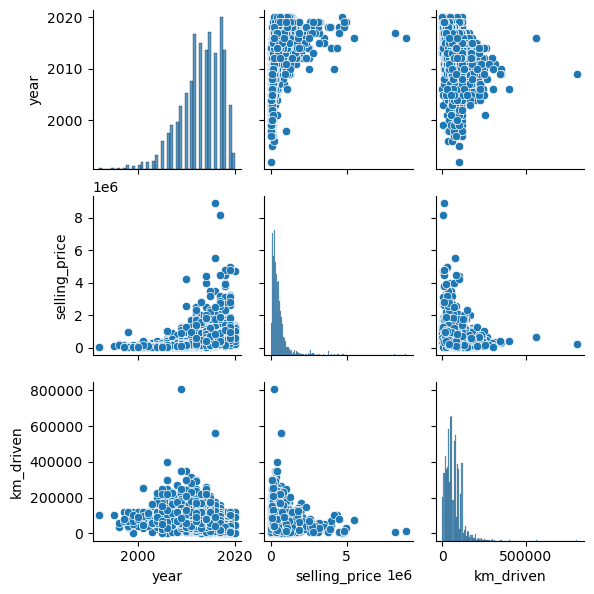

In [73]:
# Assuming 'dataset' is your DataFrame
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a pair plot with a specified height
sns.pairplot(data = df, height=2)
plt.show()


In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Correct the mappings
df['owner'] = df['owner'].map({
    'First Owner': 0, 
    'Second Owner': 1, 
    'Third Owner': 2, 
    'Fourth & Above Owner': 3, 
    'Test Drive Car': 4
})
df['transmission'] = df['transmission'].map({
    'Manual': 0, 
    'Automatic': 1
})
df['seller_type'] = df['seller_type'].map({
    'Individual': 0, 
    'Dealer': 1, 
    'Trustmark Dealer': 2
})
df['fuel'] = df['fuel'].map({
    'Diesel': 0, 
    'Petrol': 1, 
    'CNG': 2, 
    'LPG': 3, 
    'Electric': 4
})

# Drop non-numeric columns like 'name'
X = df[['owner', 'year', 'selling_price', 'km_driven', 'transmission', 'seller_type', 'fuel']]

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Print VIF data
print(vif_data)



         feature       VIF
0          owner  1.584331
1           year  8.567571
2  selling_price  2.933986
3      km_driven  3.751594
4   transmission  1.587495
5    seller_type  1.461826
6           fuel  2.336164


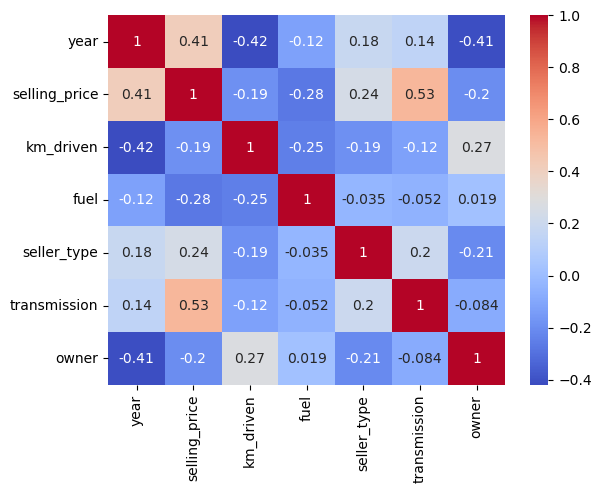

In [75]:
# Drop the categorical column 'name'
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = df_numeric.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [76]:
df.drop(columns=['name'],inplace=True)

In [77]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,1,0,0,0
1,2007,135000,50000,1,0,0,0
2,2012,600000,100000,0,0,0,0
3,2017,250000,46000,1,0,0,0
4,2014,450000,141000,0,0,0,1
...,...,...,...,...,...,...,...
4335,2014,409999,80000,0,0,0,1
4336,2014,409999,80000,0,0,0,1
4337,2009,110000,83000,1,0,0,1
4338,2016,865000,90000,0,0,0,0


In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["VIF"] = [variance_inflation_factor(X.values, i)
                  for i in range(X.shape[1])]
    vif.index = X.columns
    return vif

In [79]:
X= df
calc_vif(X)

,VIF
year,8.567571
selling_price,2.933986
km_driven,3.751594
fuel,2.336164
seller_type,1.461826
transmission,1.587495
owner,1.584331


In [80]:
print(X.shape)  # Should print (n_samples, n_features)
print(y.shape)  # Should print (n_samples,)


(4340, 7)
(1000,)


In [81]:
print(len(X), len(y))  # Ensure both have the same number of samples


4340 1000


In [82]:
X = X[:1000]


In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [84]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 7)
(800,)
(200, 7)
(200,)


In [85]:
from sklearn.linear_model import LinearRegression
mlm = LinearRegression()

mlm.fit(X_train,y_train)

y_pred = mlm.predict(X_test)

In [86]:
print("Prediction for the test set: {}".format(y_pred))

Prediction for the test set: [5.37231665 5.75387579 5.62624298 5.41248969 5.48745107 5.5070632
 5.34824635 5.72686487 5.18814117 5.41466194 5.92671631 6.15862699
 5.45402835 5.43800552 5.37055534 5.5318879  5.24668511 5.78370922
 5.60829127 5.5976059  5.30472378 5.54462291 5.37051982 5.87979392
 5.48202649 5.08415571 6.12921842 6.74261375 5.62624298 5.40178429
 5.22696017 5.28686416 5.47904717 5.37277642 4.95788074 6.32431733
 5.47775357 5.3787499  5.48885439 5.39497115 5.97091089 5.87511448
 5.47462676 5.68888928 5.58327823 5.48003747 5.50522721 5.74434588
 6.3434459  5.9303756  5.42151806 5.83690744 5.48003747 5.51613576
 5.43988417 5.61835079 5.50522721 5.43988417 6.10535868 6.14437322
 5.52326121 5.59935916 5.34824635 5.39376915 5.60079018 6.30053745
 5.5790782  5.36849659 4.81146929 5.98246359 5.3999918  5.56710313
 6.14349718 5.17011904 5.70061    5.63088344 5.46657966 5.51236127
 5.42151806 5.40478546 5.40805078 5.31411822 5.76152952 5.79642755
 5.26452388 5.96986132 5.48880726 

In [87]:
#compute model slope and intercept

a = mlm.coef_
b = mlm.intercept_
print("Estimated model slope, a:",a)
print("Estimated model intercept, b:",b)

Estimated model slope, a: [-1.59038220e-02  1.56896984e-07 -4.10303422e-06 -9.39407705e-02
 -4.33152986e-02  1.17213316e-02  4.51866296e-01]
Estimated model intercept, b: 37.68283928224231


In [88]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("RMSE Value : {:.4f}".format(rmse))
from sklearn.metrics import r2_score
print("R2 score value: {:.4f}".format(r2_score(y_test,y_pred)))
print("Mean squared error is : {:.4f}".format(mse))

RMSE Value : 2.3178
R2 score value: -0.0216
Mean squared error is : 5.3721
